# Executive Summary

This documentation presents the comprehensive data analysis of the "London Bike Sharing" project, which encompasses a period from April 1, 2015, to December 31, 2016. The objective was to understand bike rental patterns across different weather conditions, temperatures, wind speeds, and times of the day, providing actionable insights for the bike-sharing program.

# Methodology

Data processing and analysis were integral parts of this project, utilizing Python for its powerful data manipulation capabilities. The dataset was acquired through the Kaggle API, ensuring a streamlined and reproducible data retrieval process.

# Data Cleaning and Transformation:

1. Importing Necessary Libraries

In [ ]:
import pandas as pd
import kaggle
import zipfile

These libraries are essential for data manipulation (pandas), accessing the Kaggle API (kaggle), and handling zip files (zipfile).


2. Extracting Data from ZIP File

In [ ]:
zipfile_name = 'london-bike-sharing-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

This code snippet extracts the dataset from the provided ZIP file.


3. Loading the Data into a DataFrame

In [ ]:
bikes = pd.read_csv("london_merged.csv")
print(bikes.info())
print(bikes.shape)
print(bikes.head(5))

Here we read the CSV file into a pandas DataFrame and display the dataset's information, shape, and first five rows to get an overview of the data we'll be working with.



4. Analyzing Weather and Season Value Counts

In [ ]:
print(bikes.weather_code.value_counts())
print(bikes.season.value_counts())

Understanding the distribution of weather conditions and seasons in the dataset is crucial before mapping them to more descriptive values.


5. Renaming Columns

In [ ]:
new_cols_dict ={
    'timestamp': 'time',
    'cnt': 'count',
    't1': 'temperature_C',
    't2': 'temperature_perceived_C',
    'hum': 'humidity_percent',
    'wind_speed': 'wind_speed_kph',
    'weather_code': 'weather',
    'is_holiday': 'is_holiday',
    'is_weekend': 'is_weekend',
    'season': 'season'
}
bikes.rename(new_cols_dict, axis=1, inplace=True)


Renaming the columns to be more descriptive makes the data more accessible and the analysis more intuitive.


6. Normalizing Humidity Values

In [ ]:
bikes.humidity_percent = bikes.humidity_percent / 100

Humidity values are normalized to a percentage format for consistency and ease of interpretation.


7. Mapping Numerical Values to Descriptive Categories

In [ ]:
season_dict = {
    '0.0' : 'spring',
    '1.0' : 'summer',
    '2.0' : 'autumn',
    '3.0' : 'winter'
}

weather_dict = {
    '1.0' : 'Clear',
    '2.0' : 'Scattered clouds',
    '3.0' : 'Broken clouds',
    '4.0' : 'Cloudy',
    '7.0' : 'Rain',
    '10.0': 'Rain with thunderstorm',
    '26.0': 'Snowfall'
}

bikes.season = bikes.season.astype('str')
bikes.season = bikes.season.map(season_dict)

bikes.weather = bikes.weather.astype('str')
bikes.weather = bikes.weather.map(weather_dict)

This section converts the numerical codes for weather and seasons to human-readable strings, enhancing the comprehensibility of the data.



8. Exporting the Cleaned Data

In [ ]:
bikes.to_excel('london_bikes_cleaned.xlsx', sheet_name='Data')

Finally, the cleaned and transformed DataFrame is exported to an Excel file for further analysis or sharing.

# Enhanced Analytical Capabilities:

These transformations make the data more amenable to a broad array of analyses, including time series analysis, categorical data analysis, and correlation studies between weather conditions and bike rental frequencies.

- Time Series Analysis: By setting the 'time' column as an index and converting it into a datetime object, we can leverage pandas' powerful time series tools to resample, interpolate, and visualize data over time, which is crucial for identifying trends and patterns.
- Categorical Analysis: Transformed weather and season data enable grouping and aggregation operations to determine the impact of different times of the year and weather conditions on bike rentals.
- Correlation Studies: Clean and descriptive data allow for the examination of relationships between variables, such as temperature, perceived temperature, humidity, wind speed, and the number of bike rentals. This is essential for identifying key factors that influence user behavior.

# Tableau Visualizations Overview
After transforming and enhancing the data for better analytical capabilities, we utilized Tableau to create a set of dynamic visualizations. These visualizations allow us to visually explore the data and discover patterns that may not be immediately apparent from the raw figures. Below are the key visualizations included in our Tableau dashboard:

1. Total Rides Counter

This visualization provides a count of the total bike rides during the selected period, offering a quick snapshot of overall system usage.

2. Adjustable Moving Average Line Chart

The Adjustable Moving Average Line Chart offers users the flexibility to select the duration and period for the moving average, enabling the examination of trends over different timescales. This interactivity is key for identifying specific periods of interest and understanding cyclical patterns or growth trends.

3. Temperature vs Wind Speed Heatmap

This heatmap plots bike rentals against varying temperatures and wind speeds, highlighting the conditions under which bike rentals are most popular. By examining the density of points, we can infer the most and least favorable weather conditions for bike-sharing usage.

4. Weather Conditions Tooltip Chart

The Weather Conditions Tooltip Chart reveals the number of rentals that correspond to various weather scenarios. Visible upon interaction, this tool helps users connect weather conditions with rental frequency.

5. Hourly Rentals Tooltip Chart

This visualization breaks down the number of rentals by hour, uncovering the daily rhythms of bike-sharing usage. The tooltip enhances understanding by providing exact numbers for each hour upon hover.

These visualizations, together with the analytical findings from the processed data, contribute significantly to our understanding of the London Bike Sharing system's usage patterns.

# Visualization Showcase

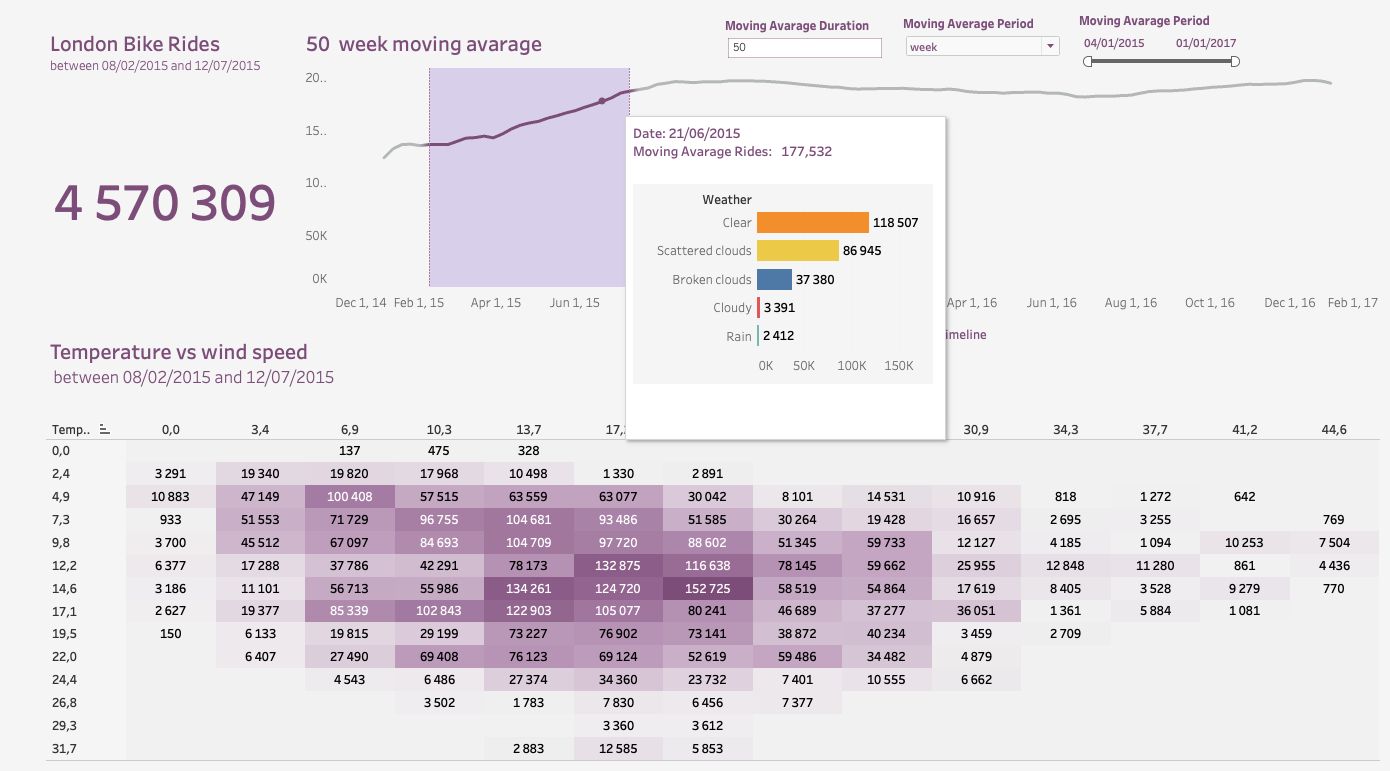

# Key Findings

- Peak rental hours align with typical commuting times, indicating a heavy use of bike-sharing for work-related travel.
- Mild temperatures and low wind speeds are the most favorable conditions for bike rentals, suggesting that weather plays a significant role in user willingness to rent bikes.
- A noticeable decline in rentals is observed during adverse weather conditions, like heavy rain or snowfall.

# Conclusion

This data-driven approach to analyzing London's bike-sharing usage provides stakeholders with a clear understanding of how various factors influence rental patterns. Such insights can guide improvements in bike availability, maintenance scheduling, and promotional strategies to increase usage during off-peak hours or less favorable weather conditions.

This dashboard serves not only as a tool for retrospective analysis but also as a platform for forecasting and strategic planning for London's bike-sharing future.